<div align="left">
<img align="left" src="front_page_fer.png" >
<div> <b>FER</b></div>
<div> Facial Expression Recognition</div>
<div> Pedro D. Marrero Fernandez</div>
<div> :), :(, :/</div>
</div>

# Metric for test

In [2]:
import numpy as np
import pandas as pd
import os

# from fer import visualizationutl as vz

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PROJECT='./netruns'
EXP_NAME='exp_net_alexnet_lr0001pl_daum_proc_001'
filenametrain = os.path.join( PROJECT, EXP_NAME, 'train.csv' )
filenameval = os.path.join( PROJECT, EXP_NAME, 'val.csv' )
print(filenametrain)
print(filenameval)

./netruns/exp_net_alexnet_lr0001pl_daum_proc_001/train.csv
./netruns/exp_net_alexnet_lr0001pl_daum_proc_001/val.csv


## Train

In [3]:
train = pd.read_csv(filenametrain)
train.head()

,epoch,iter,loss,time,top1,top2,total,type
0,0,0,3.6813,1.4380,4.6875,15.6250,50,False
1,0,25,3.0239,0.2980,14.0625,31.2500,50,False
2,0,0,3.9385,0.5828,4.6875,12.5000,392,True
3,0,25,1.3886,0.2977,48.4375,71.8750,392,True
4,0,50,1.3837,0.3221,48.4375,64.0625,392,True


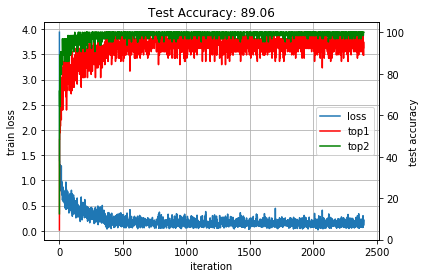

In [4]:

indx = train['type']
xiter = np.array(train['iter'][indx])
xtop1 = np.array(train['top1'][indx])
xtop2 = np.array(train['top2'][indx])
xloss = np.array(train['loss'][indx])

#plt.plot( xtop1 )
#plt.plot( xtop2 )
#plt.show()


#plt.style.use('default')
#plt.style.use('classic')
#plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
#plt.style.context('Solarize_Light2')

_, ax1 = plt.subplots()
ax2 = ax1.twinx()
pl1 = ax1.plot(np.arange(len(xloss)), xloss, label='loss')
pl2 = ax2.plot(np.arange(len(xloss)), xtop1, 'r', label='top1')
pl3 = ax2.plot(np.arange(len(xloss)), xtop2, 'g', label='top2')

ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.2f}'.format( xtop1[-1] ) )

#ax2.legend(loc='right')
lns = pl1+pl2+pl3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='right')

ax1.grid(True)



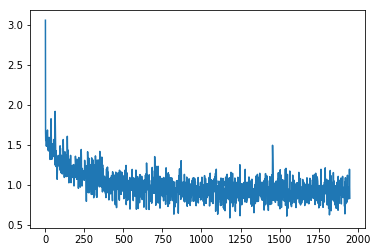

In [23]:
plt.plot( xloss )
plt.show()

## Validation

In [55]:
val = pd.read_csv(filenameval)
val.head()

,epoch,top1,top2
0,0,11.000,19.649
1,1,45.096,68.223
2,2,48.198,69.947
3,3,49.734,70.918
4,4,50.830,71.420


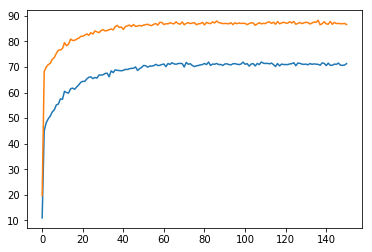

In [13]:

xtop1 = val['top1']
xtop2 = val['top2']

plt.plot( xtop1 )
plt.plot( xtop2 )
plt.show()


# Experimento Zoo pytorch for FER

In [3]:
PROJECT='./netruns'
filename = 'experiments.txt'

filetrain = list()
fileval = list()
names = list()

with open(filename, 'r') as file:
    for name in file:          
        name = name.split()[0]
        namenet = name.split('_')[2]        
        filenametrain = os.path.join( PROJECT, name, 'train.csv' )
        filenameval = os.path.join( PROJECT, name, 'val.csv' )         
        filetrain.append(filenametrain)
        fileval.append(filenameval)
        names.append(namenet)


print(filetrain)
print(fileval)
print(names)


['./netruns/exp_net_vgg11_lr0001pl_daum_proc_001/train.csv', './netruns/exp_net_simplenet_lr0001pl_daum_proc_001/train.csv', './netruns/exp_net_resnet18_lr0001pl_daum_proc_001/train.csv', './netruns/exp_net_inceptionv3_lr0001pl_daum_proc_001/train.csv', './netruns/exp_net_fmp_lr0001pl_daum_proc_001/train.csv', './netruns/exp_net_dexpression_lr0001pl_daum_proc_001/train.csv', './netruns/exp_net_cvgg_lr0001pl_daum_proc_001/train.csv', './netruns/exp_net_alexnet_lr0001pl_daum_proc_001/train.csv', './netruns/exp_net_densenet121_lr0001pl_daum_proc_001/train.csv']
['./netruns/exp_net_vgg11_lr0001pl_daum_proc_001/val.csv', './netruns/exp_net_simplenet_lr0001pl_daum_proc_001/val.csv', './netruns/exp_net_resnet18_lr0001pl_daum_proc_001/val.csv', './netruns/exp_net_inceptionv3_lr0001pl_daum_proc_001/val.csv', './netruns/exp_net_fmp_lr0001pl_daum_proc_001/val.csv', './netruns/exp_net_dexpression_lr0001pl_daum_proc_001/val.csv', './netruns/exp_net_cvgg_lr0001pl_daum_proc_001/val.csv', './netruns/e

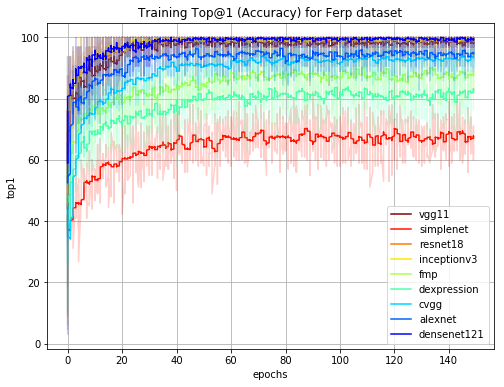

In [4]:

def smooth(x,window_len=11,window='hanning'):    
    """
    http://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
    """
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')
    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

cmap = plt.get_cmap('jet_r')
windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']

plt.figure( figsize=(8,6) )
for i,file in enumerate(filetrain):   

    train = pd.read_csv(file)      
    indx = train['type']
    xepoch = np.array(train['epoch'][indx])
    xiter = np.array(train['iter'][indx])
    xtop1 = np.array(train['top1'][indx])
    xtop2 = np.array(train['top2'][indx])
    xloss = np.array(train['loss'][indx])
    
    xftop1 = smooth(xtop1,25,windows[3]) 
    xftop1 = xftop1[:len(xtop1)]
         
    color = cmap(float(i)/len(filetrain))
    plt.plot(xepoch, xtop1, alpha=0.2, c=color)   
    plt.plot(xepoch, xftop1,label='{}'.format( names[i] ), c=color)
    
    
plt.xlabel('epochs')
plt.ylabel('top1')
plt.title('Training Top@1 (Accuracy) for Ferp dataset')
    
plt.grid(True) 
plt.legend()
#plt.savefig('./netruns/top1.png')
plt.show()



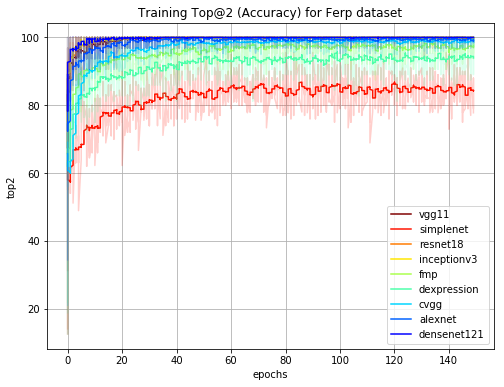

In [5]:
plt.figure( figsize=(8,6) )
for i,file in enumerate(filetrain):   

    train = pd.read_csv(file)      
    indx = train['type']
    xepoch = np.array(train['epoch'][indx])
    xiter = np.array(train['iter'][indx])
    xtop1 = np.array(train['top1'][indx])
    xtop2 = np.array(train['top2'][indx])
    xloss = np.array(train['loss'][indx])
    
    xftop2 = smooth(xtop2,25,windows[3]) 
    xftop2 = xftop2[:len(xtop2)]
         
    color = cmap(float(i)/len(filetrain))
    plt.plot(xepoch, xtop2, alpha=0.2, c=color)   
    plt.plot(xepoch, xftop2,label='{}'.format( names[i] ), c=color)
    
    
plt.xlabel('epochs')
plt.ylabel('top2')
plt.title('Training Top@2 (Accuracy) for Ferp dataset')
    
plt.grid(True) 
plt.legend()
#plt.savefig('./netruns/top1.png')
plt.show()


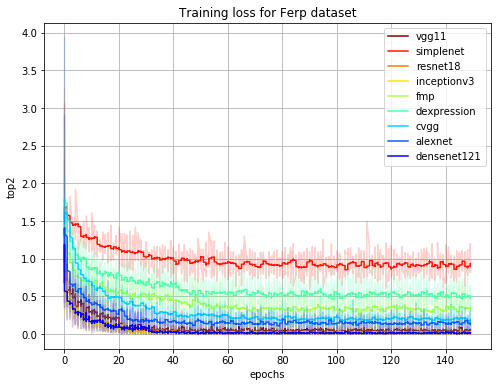

In [6]:
plt.figure( figsize=(8,6) )
for i,file in enumerate(filetrain):   

    train = pd.read_csv(file)      
    indx = train['type']
    xepoch = np.array(train['epoch'][indx])
    xiter = np.array(train['iter'][indx])
    xtop1 = np.array(train['top1'][indx])
    xtop2 = np.array(train['top2'][indx])
    xloss = np.array(train['loss'][indx])
    
    xfloss = smooth(xloss,25,windows[3]) 
    xfloss = xfloss[:len(xloss)]
         
    color = cmap(float(i)/len(filetrain))
    plt.plot(xepoch, xloss, alpha=0.2, c=color)   
    plt.plot(xepoch, xfloss,label='{}'.format( names[i] ), c=color)
    
    
plt.xlabel('epochs')
plt.ylabel('top2')
plt.title('Training loss for Ferp dataset')
    
plt.grid(True) 
plt.legend()
#plt.savefig('./netruns/top1.png')
plt.show()



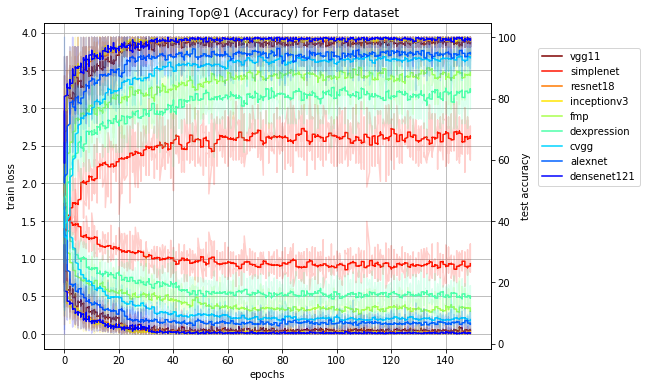

In [21]:


_, ax1 = plt.subplots( figsize=(8, 6) )
ax2 = ax1.twinx()


for i,file in enumerate(filetrain):   

    train = pd.read_csv(file)      
    indx = train['type']
    xepoch = np.array(train['epoch'][indx])
    xiter = np.array(train['iter'][indx])
    xtop1 = np.array(train['top1'][indx])
    xtop2 = np.array(train['top2'][indx])
    xloss = np.array(train['loss'][indx])
    
    xfloss = smooth(xloss,25,windows[3]) 
    xfloss = xfloss[:len(xloss)]
    xftop1 = smooth(xtop1,25,windows[3]) 
    xftop1 = xftop1[:len(xtop1)]
         
    color = cmap(float(i)/len(filetrain))
            
    ax1.plot(xepoch, xloss, c=color, alpha=0.2 )
    pl1 = ax1.plot(xepoch, xfloss, label='{}'.format( names[i] ), c=color)      
    
    ax2.plot(xepoch, xtop1, c=color, alpha=0.2 )
    pl2 = ax2.plot(xepoch, xftop1, label='{}'.format( names[i] ), c=color) 
    

ax1.set_xlabel('epochs')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Training Top@1 (Accuracy) for Ferp dataset' )


ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.5)
#lns = pl1+pl2
#labs = [l.get_label() for l in lns]
#ax1.legend(lns, labs, loc='right')

ax1.grid(True)
    
    
#plt.xlabel('epochs')
#plt.ylabel('top2')
#plt.title('Training Top@2 (Accuracy) for Ferp dataset')
    
#plt.grid(True) 
#plt.legend()
#plt.savefig('./netruns/top1.png')

plt.show()

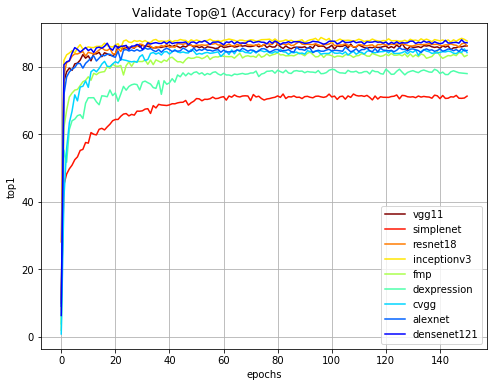

In [8]:


plt.figure( figsize=(8,6) )
cmap = plt.get_cmap('jet_r')

for i,file in enumerate(fileval):
    
    val = pd.read_csv(file)   
    xtop1 = np.array(val['top1'])
    xtop2 = np.array(val['top2'])   
    
    color = cmap(float(i)/len(fileval))
    plt.plot(xtop1, label='{}'.format( names[i] ), c=color )

    
plt.xlabel('epochs')
plt.ylabel('top1')
plt.title('Validate Top@1 (Accuracy) for Ferp dataset')

plt.legend()
plt.grid(True)
#plt.savefig('./netruns/top1.png')
plt.show()


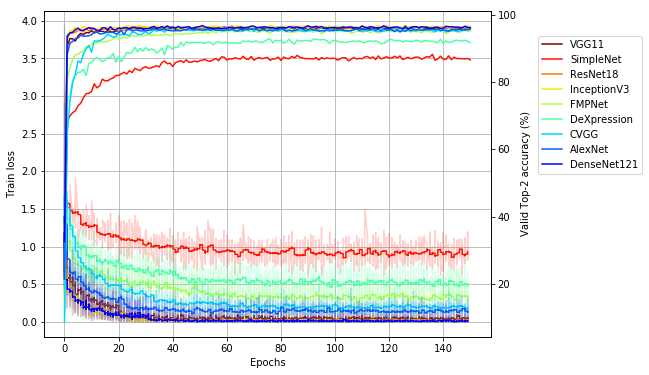

In [14]:

cmap = plt.get_cmap('jet_r')
windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']
namesex = ['VGG11', 'SimpleNet', 'ResNet18', 'InceptionV3', 'FMPNet', 'DeXpression', 'CVGG', 'AlexNet', 'DenseNet121']

_, ax1 = plt.subplots( figsize=(8, 6) )
ax2 = ax1.twinx()

for i,file in enumerate(filetrain):   

    train = pd.read_csv(file)      
    indx = train['type']
    xepoch = np.array(train['epoch'][indx])
    xiter = np.array(train['iter'][indx])
    xloss = np.array(train['loss'][indx])   
    
    xfloss = vz.smooth(xloss,25,windows[3]) 
    xfloss = xfloss[:len(xloss)]     
    
    color = cmap(float(i)/len(filetrain))            
    ax1.plot(xepoch, xloss, c=color, alpha=0.2 )
    pl1 = ax1.plot(xepoch, xfloss, label='{}'.format( namesex[i] ), c=color)   
    


for i,file in enumerate(fileval):
    
    val = pd.read_csv(file)   
    xtop1 = np.array(val['top1'])
    xtop1 = np.array(val['top2'])      
    color = cmap(float(i)/len(fileval))
    ax2.plot(xtop1, label='{}'.format( namesex[i] ), c=color )  
    

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Train loss')
ax2.set_ylabel('Valid Top-2 accuracy (%)')
#ax2.set_title('Results of Training in the Ferp dataset' )

ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.5)
ax1.grid(True)
#plt.savefig('./netruns/top1.png')
plt.show()

# Metrics

In [5]:
import sklearn.metrics as metrics


#exp_net_vgg11_lr0001pl_daum_proc_001
#exp_net_simplenet_lr0001pl_daum_proc_001
#exp_net_resnet18_lr0001pl_daum_proc_001
#exp_net_inceptionv3_lr0001pl_daum_proc_001
#exp_net_fmp_lr0001pl_daum_proc_001
#exp_net_dexpression_lr0001pl_daum_proc_001
#exp_net_cvgg_lr0001pl_daum_proc_001
#exp_net_alexnet_lr0001pl_daum_proc_001
#exp_net_densenet121_lr0001pl_daum_proc_001


mdata = pd.read_csv('./netruns/exp_net_inceptionv3_lr0001pl_daum_proc_001/jaffe_test.csv')
data = mdata.as_matrix()

yhat = np.argmax( data[:,:-1], axis=1 )
y = data[:,-1]

print(data.shape)
print(y.shape)

(205, 9)
(205,)


In [6]:
acc = metrics.accuracy_score(y, yhat)
precision = metrics.precision_score(y, yhat, average='macro')
recall = metrics.recall_score(y, yhat, average='macro')
f1_score = 2*precision*recall/(precision+recall)

print('Accuracy : %f' % acc)
print('Precision : %f' % precision)
print('Recall : %f' % recall)
print('F1 score : %f' % f1_score)
print("")

Accuracy : 0.434146
Precision : 0.354520
Recall : 0.411379
F1 score : 0.380839



In [7]:
metric = metrics.classification_report(y, yhat)
print(metric)

             precision    recall  f1-score   support

        0.0       0.32      1.00      0.48        34
        1.0       0.91      0.65      0.75        31
        2.0       0.94      0.65      0.77        26
        3.0       0.31      0.58      0.40        31
        4.0       0.00      0.00      0.00        25
        5.0       0.00      0.00      0.00        28
        6.0       0.00      0.00      0.00        30

avg / total       0.36      0.43      0.35       205



In [8]:
mc = metrics.confusion_matrix(y, yhat)
print(mc)

[[34  0  0  0  0  0  0]
 [10 20  0  1  0  0  0]
 [ 7  2 17  0  0  0  0]
 [13  0  0 18  0  0  0]
 [23  0  0  2  0  0  0]
 [ 8  0  0 20  0  0  0]
 [12  0  1 17  0  0  0]]


Normalized confusion matrix


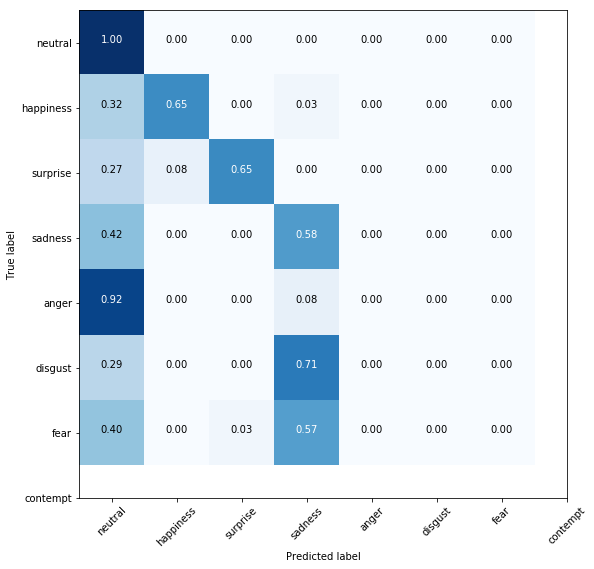

In [9]:
import itertools
emotion_name = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt']
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plt.figure( figsize=(8,8))
plot_confusion_matrix(mc, classes=emotion_name, title=' ')
plt.show()


In [16]:
PROJECT='./netruns'
filename = 'experiments.txt'

files  = list()
names = list()

with open(filename, 'r') as file:
    for name in file:          
        name = name.split()[0]
        namenet = name.split('_')[2]     
        
        filenameferp = os.path.join( PROJECT, name, 'test.csv' )       
        filenameck = os.path.join( PROJECT, name, 'ck_test.csv' )
        filenamejaffe = os.path.join( PROJECT, name, 'jaffe_test.csv' )
        filenamebu = os.path.join( PROJECT, name, 'bu_test.csv' )  
        
        files.append([filenameferp, filenameck, filenamejaffe,  filenamebu])        
        names.append(namenet)
    

print(names)
print(files)

['vgg11', 'simplenet', 'resnet18', 'inceptionv3', 'fmp', 'dexpression', 'cvgg', 'alexnet', 'densenet121']
[['./netruns/exp_net_vgg11_lr0001pl_daum_proc_001/test.csv', './netruns/exp_net_vgg11_lr0001pl_daum_proc_001/ck_test.csv', './netruns/exp_net_vgg11_lr0001pl_daum_proc_001/jaffe_test.csv', './netruns/exp_net_vgg11_lr0001pl_daum_proc_001/bu_test.csv'], ['./netruns/exp_net_simplenet_lr0001pl_daum_proc_001/test.csv', './netruns/exp_net_simplenet_lr0001pl_daum_proc_001/ck_test.csv', './netruns/exp_net_simplenet_lr0001pl_daum_proc_001/jaffe_test.csv', './netruns/exp_net_simplenet_lr0001pl_daum_proc_001/bu_test.csv'], ['./netruns/exp_net_resnet18_lr0001pl_daum_proc_001/test.csv', './netruns/exp_net_resnet18_lr0001pl_daum_proc_001/ck_test.csv', './netruns/exp_net_resnet18_lr0001pl_daum_proc_001/jaffe_test.csv', './netruns/exp_net_resnet18_lr0001pl_daum_proc_001/bu_test.csv'], ['./netruns/exp_net_inceptionv3_lr0001pl_daum_proc_001/test.csv', './netruns/exp_net_inceptionv3_lr0001pl_daum_proc

In [17]:
import sklearn.metrics as fmetrics


datasets = ['ferp', 'ckp', 'jaffe', 'bu']
metrics = list()

for i, name in enumerate(names):
    #print(i,name)
    
    tupla = list()
    for j,file in enumerate(files[i]):
        #print(datasets[j], file)   
    
        mdata = pd.read_csv(file)        
        data = mdata.as_matrix()
        yhat = np.argmax( data[:,:-1], axis=1 )
        y = data[:,-1]        

        acc = fmetrics.accuracy_score(y, yhat)        
        precision = fmetrics.precision_score(y, yhat, average='macro')
        recall = fmetrics.recall_score(y, yhat, average='macro')
        f1_score = 2*precision*recall/(precision+recall)
        
        metric = { 
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1score': f1_score,          
            }        
        
        tupla.append( metric )        
        
        #print('Accuracy : %f' % acc)
        #print('Precision : %f' % precision)
        #print('Recall : %f' % recall)
        #print('F1 score : %f' % f1_score)
        #print("")
        
    metrics.append( {name:tupla} )
    

print(metrics)
    


[{'vgg11': [{'Recall': 0.66800957746029743, 'Precision': 0.78796099151679033, 'F1score': 0.72304413319032057, 'Accuracy': 0.85973860376155564}, {'Recall': 0.47625863826573439, 'Precision': 0.5975827313023967, 'F1score': 0.53006700230902348, 'Accuracy': 0.58611111111111114}, {'Recall': 0.36651305683563745, 'Precision': 0.47760004902862047, 'F1score': 0.41474691649315371, 'Accuracy': 0.3902439024390244}, {'Recall': 0.36970783876162416, 'Precision': 0.37353158537369069, 'F1score': 0.37160987604599438, 'Accuracy': 0.41206896551724137}]}, {'simplenet': [{'Recall': 0.44502385918557563, 'Precision': 0.54147429201783104, 'F1score': 0.48853407133018933, 'Accuracy': 0.73089171974522293}, {'Recall': 0.31125662068564108, 'Precision': 0.24520369551329307, 'F1score': 0.27430985255672286, 'Accuracy': 0.39444444444444443}, {'Recall': 0.32754342431761785, 'Precision': 0.22104105571847507, 'F1score': 0.26395403785410498, 'Accuracy': 0.34285714285714286}, {'Recall': 0.28300120476226875, 'Precision': 0.23

In [29]:

data = list()
datasets = ['ferp', 'ckp', 'jaffe', 'bu']
idataset = 0

for mth in metrics:
    for k,v in mth.items():
        v = v[idataset]
        #print(k,v['Recall'], v['Precision'], v['F1score'] )
        #data.append( [v['Recall'], v['Precision'], v['F1score']] )
        data.append(v)
        
#data = np.array(data)
#print(data)

print(datasets[idataset])
df = pd.DataFrame( data, index=namesex )
print(df)
#df.to_csv( os.path.join( './netruns', 'metrics_{}.csv'.format(datasets[idataset]) ), index=False, encoding='utf-8')


ferp
             Accuracy   F1score  Precision    Recall
VGG11        0.859739  0.723044   0.787961  0.668010
SimpleNet    0.730892  0.488534   0.541474  0.445024
ResNet18     0.868706  0.750695   0.826124  0.687888
InceptionV3  0.878546  0.776306   0.864637  0.704349
FMPNet       0.843631  0.724887   0.822176  0.648187
DeXpression  0.804777  0.658341   0.785573  0.566577
CVGG         0.854047  0.634668   0.671381  0.601762
AlexNet      0.856051  0.702219   0.753063  0.657807
DenseNet121  0.874721  0.773464   0.869019  0.696840


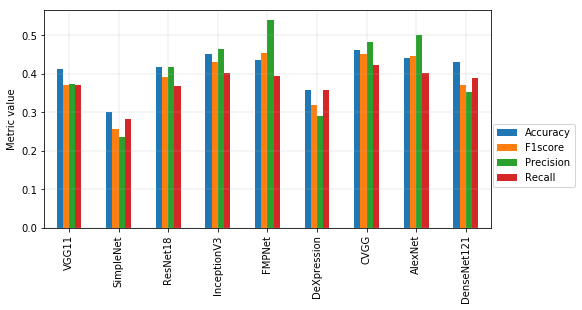

In [28]:

#df.plot.bar( figsize=(8,6) )
ax = df.plot(kind="bar", figsize=(8,4),  stacked=False)
ax.grid('on', linestyle='-', linewidth=0.25)
ax.legend(bbox_to_anchor=(1.2, 0.5))
ax.set_ylabel('Metric value')
#ax.set_title('Metric for {} dataset'.format( datasets[idataset]) )


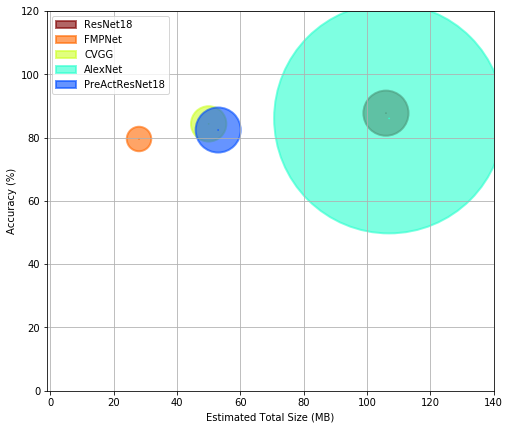

In [37]:
cmap = plt.get_cmap('jet_r')



namesex =  ['ResNet18',  'FMPNet', 'CVGG', 'AlexNet', 'PreActResNet18']
acc = np.array([ 87.695, 79.535, 84.316, 86.038, 82.372 ])
sizearch = np.array( [ 11190216,  6075400,  8757704, 57036616, 11170120])

sa = sizearch/1000000 #np.array([128, 1, 11, 21,  6, 0.8, 8, 57, 7])
# sc = np.array([20, 5, 10, 5, 17  ])
sc = np.array([ 106, 28, 50, 107, 53  ])

# mem = { 'alexnet':107.96,
#         'preactresnet18': 53.37,
#         'cvgg13': 50.16,
#         'fmp': 28.0,
#         'resnet18': 106.01
        
#       }

# acc = np.array(df['Accuracy'])
# sizearch = np.array([128799112, 1740580, 11190216, 21836392,  6075400, 846024, 8757704, 57036616, 7045704])
# sa = sizearch/1000000 #np.array([128, 1, 11, 21,  6, 0.8, 8, 57, 7])
# sc = np.array([8, 2, 20, 94, 5, 7, 10, 5, 120  ])


plt.figure(figsize=(8,8))
#fig, ax = plt.subplots()
ax=plt.subplot(aspect='equal')

for i in range(5):
    color = cmap(float(i)/len(sa))
    circ = plt.Circle( (sc[i], acc[i]), sa[i]/np.sum(sa)*60,  alpha=0.6, lw=2, edgecolor=color, facecolor=color, label='{}'.format( namesex[i] ) )
    ax.add_patch(circ)
    circ = plt.Circle( (sc[i],acc[i]), 0.1, edgecolor=color, facecolor='w' )
    ax.add_patch(circ)


ax.grid(True)    

plt.xlim(-1,140)
plt.ylim(0,120)
plt.xlabel('Estimated Total Size (MB)')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.savefig('../out/cnnsize.eps')
plt.show()




In [141]:
tablatop1 = [
72.9936294555664, 30.0, 38.88888931274414,30.0, 85.50955200195312,41.904762268066406,58.611114501953125,43.965518951416016,
85.9738540649414,37.07317352294922,58.05555725097656,41.2068977355957,86.83875274658203,40.0,59.4444465637207,41.72414016723633,
87.8546371459961,41.463417053222656,60.27778244018555,45.0,87.47209930419922,38.04878234863281,61.388893127441406,43.103450775146484,
85.37285614013672,40.9523811340332,58.888893127441406,46.2068977355957,80.38216400146484,30.4761905670166,41.66666793823242,
35.86206817626953,84.26751708984375,42.85714340209961,58.888893127441406,43.620689392089844,
]


tablatop2 = [
87.9936294555664,39.52381134033203,57.77777862548828,37.413795471191406,96.33757781982422,56.66666793823242,70.27777862548828,
61.72414016723633,95.9834213256836,56.585365295410156,73.33333587646484,61.2068977355957,96.27151489257812,59.52381134033203,
72.5,62.413795471191406,96.11093139648438,57.560977935791016,76.3888931274414,61.72414016723633,96.33407592773438,
60.97561264038086,79.72222900390625,64.82759094238281,95.76163482666016,52.380950927734375,80.55555725097656,66.03448486328125,
92.9936294555664,51.42856979370117,59.722225189208984,50.86206817626953,95.15924072265625,58.095237731933594,76.11111450195312,
64.6551742553711,
]


tabla = np.array(tablatop2).reshape(-1,4)
men = (np.mean(tabla, axis=1))
sd  = (np.std(tabla, axis=1))

for i in range( len(tabla) ):
    print(i+1,'{:.3f} + {:.3f}'.format(men[i],sd[i]))




1 55.677 + 20.268
2 71.252 + 15.279
3 71.777 + 15.255
4 72.677 + 14.449
5 72.946 + 15.092
6 75.465 + 13.935
7 73.683 + 16.178
8 63.752 + 17.243
9 73.505 + 14.067
